# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [3]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**The smartcab is not updating its position during the simulation.

It receives positive rewards when doing the right actions, i.e., not violating the driving rules and following the traffic lights. On the other hand, it receives negative resards when taking violating actions.

Because the cab is not moving at all. Then when the traffic light is green, the cab is doing the wrong action and therefore receives negative rewards. While when there is a red light, the cab is supposed to stop and therefore receives positive rewards.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**In agent.py, num_dummies determines the total number of dummy agents, default value is 100. grid_size determines the size of the map for simulation, default value is (8,6), meaning there are 8*6 intersections in the map. update_delay determines the number of seconds between two actions of the smartcab in the simulation, default value is 2.0

The function act in Environment class is called when considering an action and perform it if it is legal.

render_text() displays the simulation trail data in terminal, and only display the previous state, trail result, and time remaining. render() displays the trail data in the GUI, and it shows more details about the simulation, including the map, movements of dummy and smart agents, previous state, action, trail result ,time remaining and whether the trail is a success or not.

next_waypoint() first checks if the agent is already at destination, then it checks if the destination is to the west or east of the agent, finally it checks if the destination is to the north or south of the agent.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


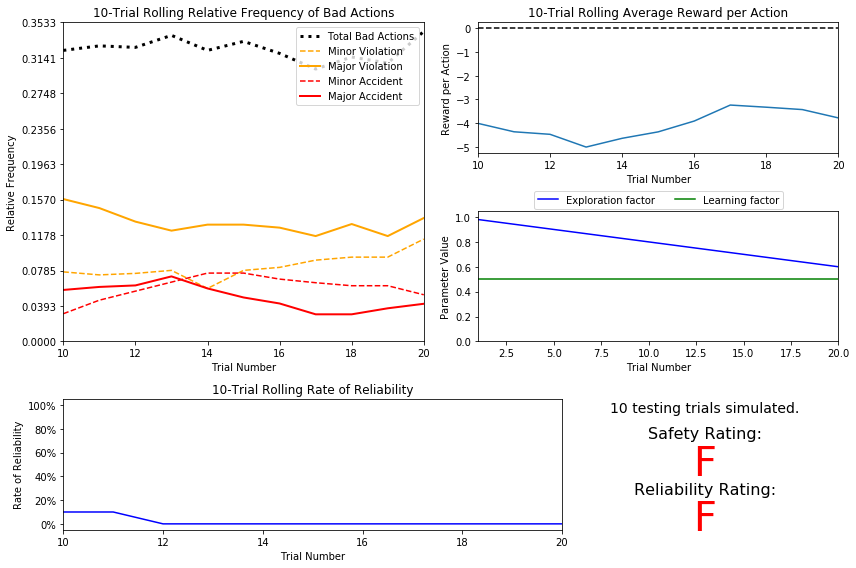

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning_20.csv')

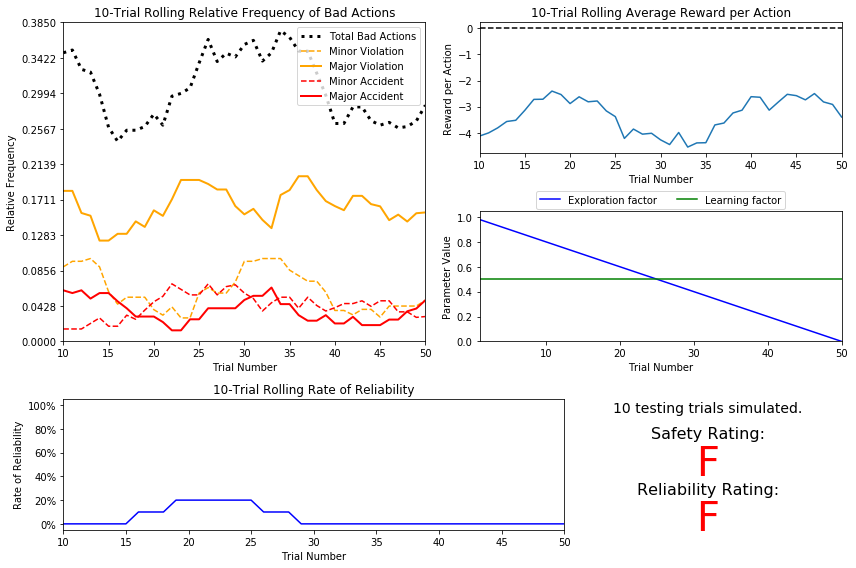

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning_50.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**The frequency of the driving agent making bad decisions is around 27% - 35%. Averagely, one of every three decisions  is a bad decision. The accidents (both minor and major) caused by bad decisions are approximately 8% - 12%, so about one third of the bad decisions cause accident.

Given such a large map and so many dummy agents, the probability of a random moving cab to reach its destination without any violations and accidents is negligible. Since we are only making 20 trials, it's reasonable to see very few success trails. So the approximately 0 reliability of the random driving agent makes sense.

The agent receive a negative reward which is around -4 to -3. During the simulation, by observing that the most negative reward is about -9 to -10, while the positive rewards is only around 1 or 2, the agent's average reward is low and that means it has been penalized heavily.

As I increase the number of training trials to 50. I see that the fluctuations of all those data plots increases. While they are still standing on the same saverage level. So averagely, there is no significant change when the number of trials increases. But between different trials, there may be significant differences.

This kind of smartcab is neither safe nor reliable for the passengers. Since there is a high possibility for the agent to make a bad decision. The possibility of causing an accident is also high. Moreover, the agent seldom reaches its destination. So the agent is neither safe nor reliable.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**The waypoint and three features, light, oncoming and left in inputs should be the most important features for learning safety and efficiency. Note that, vihecles to the right does not affect the determination of potential moving directions.

Basicly speaking, all rules defining the violating actions are based on the three features in inputs. Also the features in inputs are keys to verify whether there is a potential accident if the agent is taking a specific action. So understanding the features in input are important for the agent to move safely. Moreover, the agents need to move towards its destination in order to reach there, and all the available directions are determined by the inputs. So inputs are also very important for learning efficiency.

Waypoint indicates a good option for the agent to move along, the agent may not always choose to move along that direction in current trial due to constraints of traffic rules . However, the agent does have to follow waypoint in most of the time in order to reach its destination. So waypoint affects the efficiency very much.

Deadline is not so relevant for safety and efficiency. Because it sets an time limit for the agent to reach its destination. Only when the time remain is very limited and the agent is still far away from the destination, deanline affects efficiency and safety. Because the agent may choose to violate the traffic rules in order to reach its destination in time or just fails to reach its destination.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**The space for those features are as following:

waypoint: forward, left, right

light: green,red

left: forward, left, right, none

oncoming: forward, left, right, none

So theoretically ,there are 3\*2\*4\*4=96 different states that the agent may take. This is not too many for the agent to learn all policies within a reasonable number of training trials. But I expect that there will need a lot of training trials for the agent to completely learn all the rules defined with respect to each state. The feature 'right' is not included because it does not affect the potential direction of the agent and is not envolved in any traffic rules.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

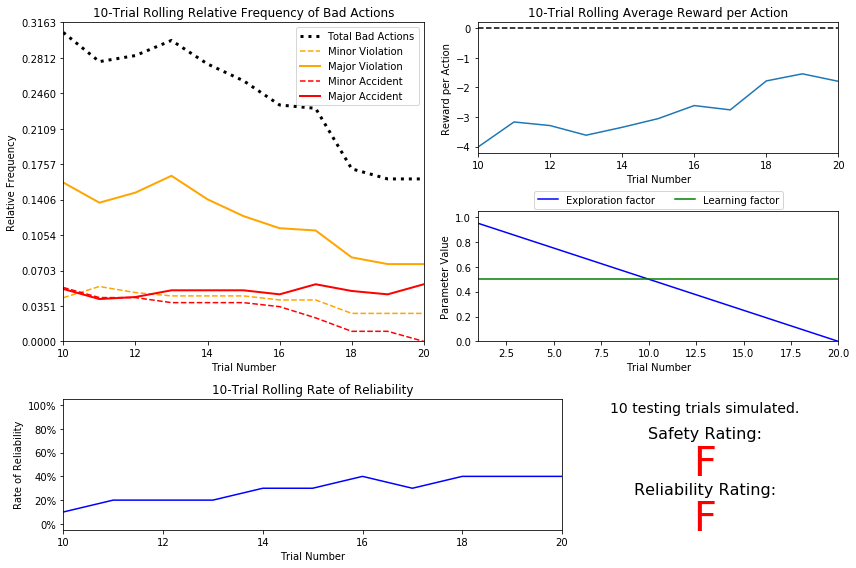

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_20.csv')

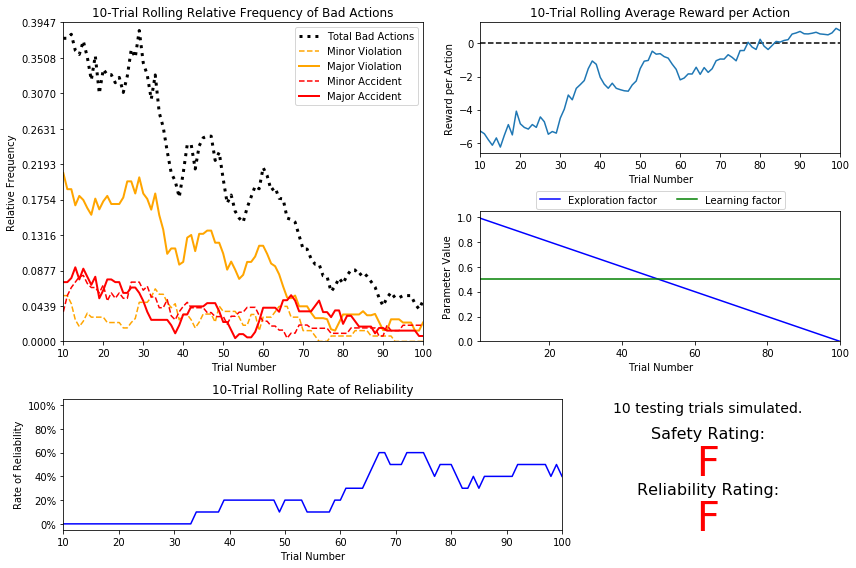

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_100.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**Now there are some differences comparing to the basic agent simulation. Notice that the frequency of making bad actions reduces as the agent learns, due to that the frequency of minor violations reduces, meaning the agent have learnt to avoid minor violations in these 20 training trials. Rolling rate of reliability increases a little, meaning the possibility of reaching the destination increases along the process of learning. The averaged rewards also increases, meaning the movements of the agent is safer and safer. The two ratings are not changing, meaning that the agent is still neither safe nor reliable. After all, 20 train trials is too few for the agent to learn proper actions in all the states. So the overall improvement of the agent performance is not good enough. The learning process needs to optimized in order to futher increase the agent's safety and reliability.

From the above analysis, I conclude that the Q-learning agent should behave better than the basic agent. That makes sense, because the Q-learning agent is learning new rules based on the rewards it gets, in each combination of a state and an action, and the reward reflects whether or not the action is safe and reliable. As it learns, since the epsilon is decreasing, the agent tends to make decisions based on its learnt knowledge instead of randomly choices. So generally, I expect that everything is going better.

The epsilon decaying rate is chosen to be 0.05 in this experiment, and I do see the change of epsilon in each training trail's parameters panel. While we require that epsilon to be larger than 0 in the training trials, for the agent to learn something new instead of purely making decisions based on knowledge. So the total number of training trials would be at most 20. I see there are 20 training trials in this experiment.

To take more training trials, I have to decrease the epsilon decaying rate. By setting the decaying rate to be 0.01, I'm able to take 100 training trials and the results are shown above. Frequency of all kinds of bad actions decays as the agent learns. The average rewards finally becomes positive. Rolling rate of reliability start to increase more and more. However, the two ratings are not changing. Meaning the agent's performance is still not beyond the threshold. While a positive conclusion is that, by increasing the number of training trials, the agent does better than before. So hopefully, by giving even more training trials. The agent can improve its safety and reliability ratings.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

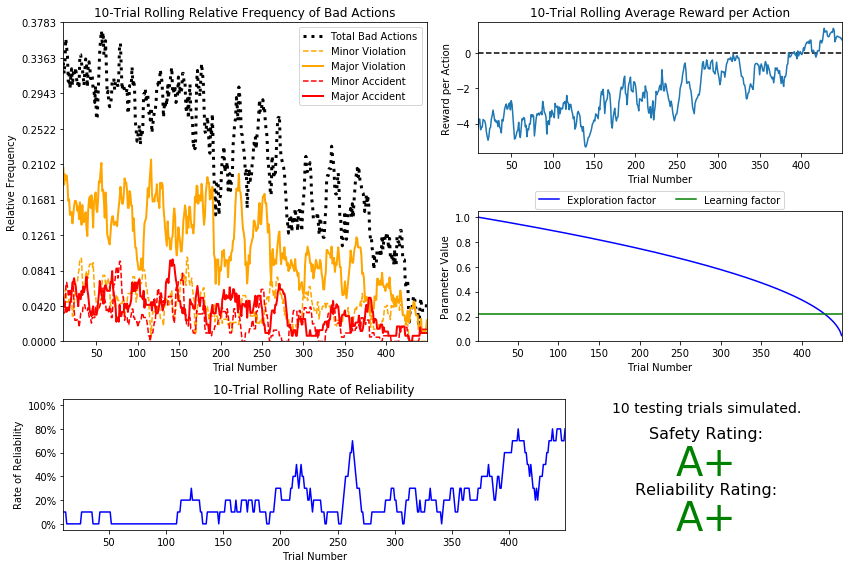

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** As I mentioned in the answer to Question 4. Each state in the state space consists four elements:

waypoint: forward, left, right

light: green,red

left: forward, left, right, none

oncoming: forward, left, right, none

I expect the agent following a proper policy to avoid all traffic violations and tries its best to follow the waypoint. Then sample policy examples that the agent should learn are as following:

(left, red, forward, none), then the agent should stay, or taking action None
(right, red, right, none), then the agent should turn right
(right, red, left, forward), then the agent should stay
(left, green, right, right), then the agent should either move forward or turn right
(left, green, left, forward), then the agent should turn left

The recorded state action rewards are as following (I added some explanation after each state):
/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

('left', 'green', 'forward', 'left')
 -- forward : 0.69
 -- None : -2.91
 -- right : 0.57
 -- left : -8.10

('left', 'red', 'right', None)
 -- forward : -18.14
 -- None : 2.03
 -- right : 0.70
 -- left : 0.00

('right', 'green', 'forward', 'right')
 -- forward : 0.77
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('left', 'red', 'right', 'left')
 -- forward : -10.19
 -- None : 1.39
 -- right : 0.41
 -- left : -21.09

('forward', 'green', 'forward', None)
 -- forward : 2.13
 -- None : -4.06
 -- right : 0.99
 -- left : -19.16

('right', 'green', 'right', 'forward')
 -- forward : 0.29
 -- None : -1.82
 -- right : 1.84
 -- left : 0.00

('forward', 'red', 'left', None)
 -- forward : -12.40
 -- None : 2.04
 -- right : 0.71
 -- left : -11.19

('left', 'red', 'right', 'right')
 -- forward : -2.37
 -- None : 0.00
 -- right : 0.78
 -- left : 0.00

('left', 'green', None, 'forward')
 -- forward : 0.59
 -- None : -4.96
 -- right : 1.06
 -- left : 1.85

('left', 'green', 'right', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.48
 -- left : 0.00

('forward', 'red', 'right', 'right')
 -- forward : -6.39
 -- None : 1.34
 -- right : 0.54
 -- left : 0.00

('right', 'green', 'left', 'right')
 -- forward : 0.19
 -- None : 0.41
 -- right : 0.89
 -- left : 0.00

('left', 'red', None, 'right')
 -- forward : -17.03
 -- None : 1.90
 -- right : 0.99
 -- left : -10.66

('left', 'green', None, None)
 -- forward : 0.64
 -- None : -5.22
 -- right : 1.18
 -- left : 1.94

('left', 'green', None, 'left')
 -- forward : 0.91
 -- None : -4.28
 -- right : 0.89
 -- left : 1.91

('left', 'red', 'left', 'forward')
 -- forward : -25.18
 -- None : 1.53
 -- right : -18.82
 -- left : -25.32

('right', 'red', 'right', 'left')
 -- forward : -2.39
 -- None : 0.33
 -- right : 1.79
 -- left : -8.77

('forward', 'red', 'right', None)
 -- forward : -11.86
 -- None : 1.83
 -- right : 0.81
 -- left : -36.79

('left', 'green', 'left', 'forward')
 -- forward : 0.27
 -- None : 0.60
 -- right : 1.06
 -- left : 1.39

('forward', 'green', None, 'right')
 -- forward : 1.43
 -- None : -3.13
 -- right : 0.95
 -- left : 0.82

('right', 'red', 'left', 'forward')
 -- forward : -20.76
 -- None : 1.38
 -- right : -15.41
 -- left : -24.97

('forward', 'red', 'right', 'left')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.49
 -- left : 0.00

('right', 'red', 'right', 'forward')
 -- forward : -15.60
 -- None : 0.57
 -- right : -15.47
 -- left : 0.00

('left', 'green', 'left', 'left')
 -- forward : 0.24
 -- None : 0.69
 -- right : 0.95
 -- left : 0.82

('forward', 'green', 'right', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.31
 -- left : 0.00

('left', 'green', 'left', None)
 -- forward : 0.69
 -- None : 0.83
 -- right : 0.64
 -- left : 1.61

('right', 'green', 'forward', None)
 -- forward : 0.33
 -- None : -3.35
 -- right : 1.95
 -- left : -14.24

('left', 'green', 'forward', 'right')
 -- forward : 0.48
 -- None : -2.12
 -- right : 0.10
 -- left : -7.61

('left', 'green', 'right', 'left')
 -- forward : 0.51
 -- None : -1.24
 -- right : 0.36
 -- left : 0.00

('left', 'red', None, 'left')
 -- forward : -18.50
 -- None : 2.25
 -- right : 0.97
 -- left : -10.04

('forward', 'green', 'right', 'forward')
 -- forward : 1.65
 -- None : -2.23
 -- right : 0.33
 -- left : -10.48

('forward', 'green', 'left', 'left')
 -- forward : 0.73
 -- None : 0.43
 -- right : 0.42
 -- left : 1.07

('right', 'green', 'left', 'left')
 -- forward : 0.00
 -- None : 0.62
 -- right : 1.87
 -- left : 0.53

('left', 'red', 'left', 'left')
 -- forward : -11.21
 -- None : 1.97
 -- right : 0.83
 -- left : -6.86

('right', 'red', 'forward', None)
 -- forward : -9.05
 -- None : 1.87
 -- right : 1.57
 -- left : -11.80

('left', 'green', 'forward', None)
 -- forward : 0.49
 -- None : -4.48
 -- right : 0.57
 -- left : -19.12

('right', 'red', 'left', 'right')
 -- forward : -2.35
 -- None : 1.51
 -- right : 1.23
 -- left : -10.67

('forward', 'red', 'forward', 'forward')
 -- forward : -21.06
 -- None : 1.76
 -- right : -12.71
 -- left : -25.03

('left', 'red', 'forward', 'right')
 -- forward : -2.40
 -- None : 1.61
 -- right : 0.56
 -- left : -3.92

('right', 'green', None, 'right')
 -- forward : 0.41
 -- None : -2.04
 -- right : 1.60
 -- left : 0.63

('right', 'green', 'forward', 'left')
 -- forward : 0.19
 -- None : 0.00
 -- right : 1.64
 -- left : -4.44

('left', 'green', 'right', None)
 -- forward : 0.37
 -- None : -1.58
 -- right : 0.92
 -- left : 0.00

('forward', 'red', 'forward', 'left')
 -- forward : -10.68
 -- None : 1.95
 -- right : 0.90
 -- left : -5.27

('forward', 'green', 'forward', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.60
 -- left : -4.26

('right', 'green', None, 'forward')
 -- forward : 1.07
 -- None : -5.18
 -- right : 2.08
 -- left : 0.78

('forward', 'red', 'forward', None)
 -- forward : -11.42
 -- None : 1.73
 -- right : 0.98
 -- left : -15.00

('left', 'red', None, 'forward')
 -- forward : -37.17
 -- None : 1.76
 -- right : -19.79
 -- left : -34.33

('forward', 'green', None, 'left')
 -- forward : 1.61
 -- None : -4.83
 -- right : 1.14
 -- left : 0.81

('forward', 'red', 'right', 'forward')
 -- forward : -15.56
 -- None : 0.90
 -- right : -10.31
 -- left : 0.00

('left', 'green', None, 'right')
 -- forward : 0.74
 -- None : -3.00
 -- right : 0.59
 -- left : 1.83

('right', 'green', None, 'left')
 -- forward : 0.59
 -- None : -4.77
 -- right : 1.74
 -- left : 0.54

('right', 'red', 'right', None)
 -- forward : -9.48
 -- None : 1.52
 -- right : 1.88
 -- left : -28.52

('forward', 'green', 'forward', 'forward')
 -- forward : 1.82
 -- None : -1.26
 -- right : 0.24
 -- left : 0.00

('forward', 'green', 'left', 'right')
 -- forward : 0.41
 -- None : 0.03
 -- right : 0.23
 -- left : 0.32

('right', 'green', 'forward', 'forward')
 -- forward : 0.25
 -- None : -1.23
 -- right : 1.54
 -- left : -4.43

('right', 'red', None, 'forward')
 -- forward : -38.97
 -- None : 1.92
 -- right : -19.50
 -- left : -36.62

('forward', 'red', 'forward', 'right')
 -- forward : 0.00
 -- None : 1.75
 -- right : 0.42
 -- left : -4.00

('forward', 'green', 'right', None)
 -- forward : 1.77
 -- None : -2.52
 -- right : 0.86
 -- left : -12.66

('forward', 'red', 'left', 'right')
 -- forward : -3.72
 -- None : 1.36
 -- right : 0.46
 -- left : -9.57

('forward', 'red', None, None)
 -- forward : -12.25
 -- None : 1.80
 -- right : 1.13
 -- left : -14.76

('forward', 'green', None, None)
 -- forward : 1.57
 -- None : -5.10
 -- right : 1.10
 -- left : 0.69

('right', 'green', 'right', 'left')
 -- forward : 0.05
 -- None : -2.88
 -- right : 1.36
 -- left : -8.00

('forward', 'green', 'left', None)
 -- forward : 2.41
 -- None : 0.92
 -- right : 1.15
 -- left : 1.13

('left', 'green', 'right', 'forward')
 -- forward : 0.62
 -- None : -1.16
 -- right : 0.28
 -- left : -4.54

('right', 'green', 'right', None)
 -- forward : -0.00
 -- None : -1.95
 -- right : 1.96
 -- left : -12.40

('forward', 'red', 'left', 'forward')
 -- forward : -25.22
 -- None : 1.75
 -- right : -19.03
 -- left : -28.42

('forward', 'green', None, 'forward')
 -- forward : 2.10
 -- None : -5.04
 -- right : 1.00
 -- left : 0.93

('right', 'red', None, 'right')
 -- forward : -13.60
 -- None : 1.74
 -- right : 1.63
 -- left : -3.90

('forward', 'green', 'left', 'forward')
 -- forward : 1.52
 -- None : 0.08
 -- right : 0.82
 -- left : 0.63

('right', 'red', 'forward', 'forward')
 -- forward : -15.56
 -- None : 1.59
 -- right : -15.45
 -- left : -30.95

('left', 'red', 'left', None)
 -- forward : -10.65
 -- None : 1.81
 -- right : 0.73
 -- left : -10.31

('right', 'red', 'forward', 'left')
 -- forward : -2.31
 -- None : 0.78
 -- right : 1.24
 -- left : -10.32

('right', 'green', None, None)
 -- forward : 0.63
 -- None : -5.13
 -- right : 2.15
 -- left : 1.17

('forward', 'green', 'forward', 'left')
 -- forward : 1.60
 -- None : -3.78
 -- right : 1.00
 -- left : -14.10

('right', 'green', 'left', 'forward')
 -- forward : 0.80
 -- None : 0.32
 -- right : 1.54
 -- left : 0.19

('left', 'red', 'forward', 'left')
 -- forward : -3.87
 -- None : 1.75
 -- right : 0.59
 -- left : -2.20

('forward', 'red', 'left', 'left')
 -- forward : -15.29
 -- None : 1.42
 -- right : 0.69
 -- left : -5.35

('right', 'red', 'left', None)
 -- forward : -9.87
 -- None : 1.67
 -- right : 1.69
 -- left : -15.46

('left', 'red', 'right', 'forward')
 -- forward : -8.74
 -- None : 1.14
 -- right : -4.34
 -- left : -15.37

('left', 'red', 'forward', None)
 -- forward : -12.85
 -- None : 2.17
 -- right : 0.77
 -- left : -10.31

('left', 'green', 'left', 'right')
 -- forward : 0.35
 -- None : 0.28
 -- right : 1.18
 -- left : 0.56

('right', 'red', 'left', 'left')
 -- forward : -3.71
 -- None : 1.53
 -- right : 1.76
 -- left : -5.44

('left', 'red', 'left', 'right')
 -- forward : -9.96
 -- None : 1.80
 -- right : 0.77
 -- left : -7.53

('left', 'red', 'forward', 'forward')
 -- forward : -28.69
 -- None : 1.26
 -- right : -7.78
 -- left : -33.10

('forward', 'red', None, 'left')
 -- forward : -14.87
 -- None : 2.02
 -- right : 0.82
 -- left : -22.71

('right', 'red', None, 'left')
 -- forward : -19.64
 -- None : 1.49
 -- right : 1.89
 -- left : -10.57

('forward', 'red', None, 'right')
 -- forward : -7.23
 -- None : 2.05
 -- right : 0.96
 -- left : -17.11

('right', 'red', None, None)
 -- forward : -11.62
 -- None : 1.40
 -- right : 1.76
 -- left : -9.70

('left', 'red', None, None)
 -- forward : -16.69
 -- None : 1.79
 -- right : 1.34
 -- left : -10.29

('right', 'green', 'right', 'right')
 -- forward : 0.00
 -- None : -1.18
 -- right : 1.18
 -- left : 0.00

('forward', 'green', 'right', 'left')
 -- forward : 1.19
 -- None : -3.26
 -- right : 0.32
 -- left : 0.00

('right', 'red', 'forward', 'right')
 -- forward : 0.00
 -- None : 0.97
 -- right : 1.34
 -- left : -8.83

('left', 'green', 'forward', 'forward')
 -- forward : 0.63
 -- None : -2.18
 -- right : 0.62
 -- left : -10.66

('right', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : 0.30
 -- right : 0.95
 -- left : 0.00

('forward', 'red', None, 'forward')
 -- forward : -38.83
 -- None : 2.27
 -- right : -19.47
 -- left : -30.97

('right', 'green', 'left', None)
 -- forward : 0.88
 -- None : 1.13
 -- right : 2.13
 -- left : 0.89

For all the states, the agent follows the traffic rules. 

While there are some states that the agent is not moving as expected:
('right', 'green', 'forward', 'right'), the agent moves forward
('left', 'green', 'left', 'left'), the agent turns right
('forward', 'green', 'right', 'right') the agent turns right
('forward', 'green', 'left', 'left') the agent turns left
('right', 'red', 'forward', none) the agent stays
('right', 'red', 'left', 'right') the agent stays
('forward', 'green', 'forward', 'right') the agent turns right
('right', 'red', none, 'right') the agent stays
('left', 'green', 'left', 'right') the agent turns right
All the above policies are still making the agent follow the traffic rule. However, since the agent is not following the waypoint in these policies. It may take longer time for the agent to reach its destination.

Overall, this is a correct and very safe policy. In one trial, as long as the agent is not following the above unexpected policies very often, the policy is highly possible to guide the agent reach its destination.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**In order to apply the future reward in the algorithm, we need to have well defined transitions and a proper way to figure out the future reward.

With respect to agent itself, it does not know how valuable the future reward is. For example, an agent turns left and reach its destination and another agent turns left and becomes only closer to its destination would get approximately the same reward in our system. But they would receive different rewards if future reward is applied. However, since the agent is not receiving the information about how far it is way from the destination. It's imposiible for the agent to evaluate this future reward.

With respect to the environment, since there are highly randomness in the state of light and surrounding traffic, it's very hard to have a well defined transition. Or in other words, it's hard to know what the next state is after the agent takes one action in current state.

These two characteristic makes it invalid to apply future reward in our system.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.